# Wujciak Final Project - Exploratory Analysis

### Preparing Datafiles

In [191]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

In [192]:
bs = pd.read_csv('../Final Project/Basic_Stats.csv')
rb = pd.read_csv('../Final Project/Game_Logs_Runningback 2.csv')
wr = pd.read_csv('../Final Project/Game_Logs_Wide_Receiver_and_Tight_End.csv')

#### Create Datafiles for Current Player Vitals

In [193]:
bs = bs.set_index(['Player Id'])
bs.head(2)

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Position,Weight (lbs),Years Played
Player Id,,,,,,,,,,,,,,,
fredevans/2513736,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,NaN,185.0,1946 - 1948
jimraiff/2523700,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,NaN,235.0,1954 - 1954


#### Remove stats from before 1980. Considering this the modern era of football.

In [194]:
rb = rb.set_index(['Player Id'])
rb = rb.loc[(rb.Year > 1979)]
rb = rb.loc[(rb['Rushing Attempts'] > 0)]
rb.head(2)

,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,...,Yards Per Carry,Longest Rushing Run,Rushing TDs,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs,Fumbles,Fumbles Lost
Player Id,,,,,,,,,,,,,,,,,,,,,
bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,7,10/20,Away,ATL,L,24 to 31,...,--,--,--,--,--,--,--,--,--,--
bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,8,10/27,Home,NYG,L,13 to 21,...,--,--,--,--,--,--,--,--,--,--


In [195]:
wr = wr.set_index(['Player Id'])
wr = wr.loc[(wr.Year > 1979)]
wr = wr.loc[(wr['Receptions'] > 0)]
wr.head(2)

,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,Score,...,Yards Per Reception,Longest Reception,Receiving TDs,Rushing Attempts,Rushing Yards,Yards Per Carry,Longest Rushing Run,Rushing TDs,Fumbles,Fumbles Lost
Player Id,,,,,,,,,,,,,,,,,,,,,
floydraglin/2523695,"Raglin, Floyd",NaN,1987,Regular Season,3,10/04,Away,SEA,L,20 to 24,...,--,--,--,--,--,--,--,--,--,--
floydraglin/2523695,"Raglin, Floyd",NaN,1987,Regular Season,4,10/11,Home,KC,W,42 to 0,...,--,--,--,--,--,--,--,--,--,--


#### Checking Earliest Dates for All Datafiles

In [196]:
rb = rb.merge(bs)
rb = rb.set_index(['Name'])
rb.Year.sort_values().head(2)

Name
Carpenter, Rob    1980
Taylor, Billy     1980
Name: Year, dtype: int64

In [198]:
wr = wr.merge(bs)
wr = wr.set_index(['Name'])
wr.Year.sort_values().head(2)

Name
Feacher, Ricky    1980
Chandler, Bob     1980
Name: Year, dtype: int64

#### Column Names

In [199]:
rb = rb.drop(['Birth Place',
 'Birthday','High School',
 'High School Location',
 'Number','Years Played','Experience','Current Status'], axis=1, inplace=False)

wr = wr.drop(['Birth Place',
 'Birthday','High School',
 'High School Location',
 'Number','Years Played','Experience', 'Current Status'], axis=1, inplace=False)

In [200]:
print(list(rb))

['Position', 'Year', 'Season', 'Week', 'Game Date', 'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played', 'Games Started', 'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Longest Rushing Run', 'Rushing TDs', 'Receptions', 'Receiving Yards', 'Yards Per Reception', 'Longest Reception', 'Receiving TDs', 'Fumbles', 'Fumbles Lost', 'Age', 'College', 'Current Team', 'Height (inches)', 'Weight (lbs)']


In [201]:
print(list(wr))

['Position', 'Year', 'Season', 'Week', 'Game Date', 'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played', 'Games Started', 'Receptions', 'Receiving Yards', 'Yards Per Reception', 'Longest Reception', 'Receiving TDs', 'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Longest Rushing Run', 'Rushing TDs', 'Fumbles', 'Fumbles Lost', 'Age', 'College', 'Current Team', 'Height (inches)', 'Weight (lbs)']


In [202]:
#fix numeric issues
rb = rb.replace('--',0)
rb['Longest Rushing Run'] = rb['Longest Rushing Run'].map(lambda x: str(x).rstrip('T'))
rb['Longest Reception'] = rb['Longest Reception'].map(lambda x: str(x).rstrip('T'))
#rb_full['Experience'] = rb_full['Experience'].map(lambda x: str(x).replace('season','').replace('st','').replace('nd','').replace('rd','').replace('th','').replace('Rookie','0').lstrip())
rb['Experience'] = 2017 - rb['Year']
rb = rb.apply(pd.to_numeric, errors='ignore')

#fix numeric issues
wr = wr.replace('--',0)
wr['Longest Rushing Run'] = wr['Longest Rushing Run'].map(lambda x: str(x).rstrip('T'))
wr['Longest Reception'] = wr['Longest Reception'].map(lambda x: str(x).rstrip('T'))
#wr_full['Experience'] = wr_full['Experience'].map(lambda x: str(x).replace('season','').replace('st','').replace('nd','').replace('rd','').replace('th','').replace('Rookie','0').lstrip())
wr['Experience'] = 2017 - wr['Year']
wr = wr.apply(pd.to_numeric, errors='ignore')

### Vizualize Important Components of the Data and Some Key Covariates + Cleanup

#### RB Analysis

In [205]:
print(rb.shape)
rb.describe()

(59648, 29)


,Year,Week,Games Played,Games Started,Rushing Attempts,Rushing Yards,Yards Per Carry,Longest Rushing Run,Rushing TDs,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs,Fumbles,Fumbles Lost,Age,Height (inches),Weight (lbs),Experience
count,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,59648.000000,58057.000000,59646.000000,59646.000000,59648.000000
mean,2000.514334,8.599987,0.871312,0.241483,5.240109,21.418874,2.243170,7.006706,0.152042,1.105653,9.082601,3.665162,5.404188,0.037202,0.062986,0.034519,41.816163,71.480518,221.153254,16.485666
std,11.027557,5.438172,0.334857,0.427986,7.325149,34.305837,2.977056,10.646674,0.440428,1.705545,16.644510,5.853744,8.964394,0.197748,0.267257,0.193093,12.010492,1.877160,20.090025,11.027557
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-24.000000,-24.000000,-24.000000,0.000000,0.000000,-24.000000,-15.000000,-15.000000,0.000000,0.000000,0.000000,21.000000,66.000000,165.000000,1.000000
25%,1991.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,70.000000,207.000000,7.000000
50%,2002.000000,8.000000,1.000000,0.000000,2.000000,3.000000,1.600000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,72.000000,220.000000,15.000000
75%,2010.000000,13.000000,1.000000,0.000000,8.000000,31.000000,3.900000,11.000000,0.000000,2.000000,12.000000,6.700000,9.000000,0.000000,0.000000,0.000000,51.000000,73.000000,235.000000,26.000000
max,2016.000000,23.000000,1.000000,1.000000,43.000000,296.000000,97.000000,97.000000,5.000000,17.000000,204.000000,94.000000,94.000000,4.000000,3.000000,3.000000,108.000000,78.000000,320.000000,37.000000


In [206]:
rb.dtypes

Position                object
Year                     int64
Season                  object
Week                     int64
Game Date               object
Home or Away            object
Opponent                object
Outcome                 object
Score                   object
Games Played             int64
Games Started            int64
Rushing Attempts         int64
Rushing Yards            int64
Yards Per Carry        float64
Longest Rushing Run      int64
Rushing TDs              int64
Receptions               int64
Receiving Yards          int64
Yards Per Reception    float64
Longest Reception        int64
Receiving TDs            int64
Fumbles                  int64
Fumbles Lost             int64
Age                    float64
College                 object
Current Team            object
Height (inches)        float64
Weight (lbs)           float64
Experience               int64
dtype: object

In [207]:
#fix empty cell issues
print(len(rb) - len(rb['Rushing Attempts'].dropna()))
print(len(rb) - len(rb['Rushing TDs'].dropna()))

0
0


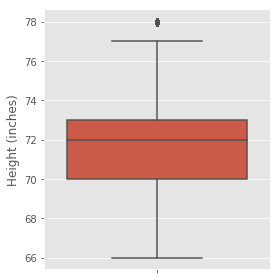

In [210]:
#side by side violins of height and weight
sns.factorplot(
    y='Height (inches)',
    data=rb, 
    kind='box'
);
#the measurer esitmates the players height to the half inch most of the time
#and to the quarter inch less frequently, so there are dips in between
#this makes the violin less helpful so switching to box instead

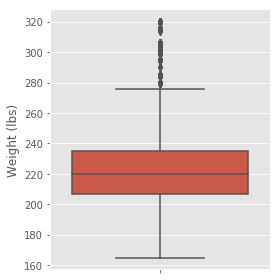

In [211]:
sns.factorplot(
    y='Weight (lbs)',
    data=rb, 
    kind='box'
);

#similar to height, measurers round to 5 lbs in some instances
#this makes the violin less helpful so switching to box instead

In [212]:
#data.loc[(data.Ozone > 31), 'Solar.R']
rb_college_counts = rb.College.value_counts()
rb_college_counts.head(3)

Auburn        1523
Penn State    1355
Alabama       1341
Name: College, dtype: int64

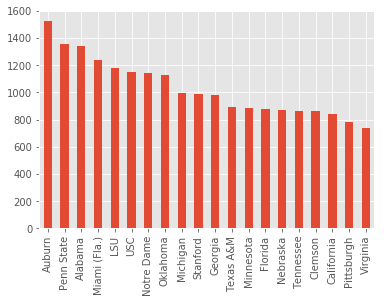

In [213]:
rb_college_counts[:20].plot(kind='bar')

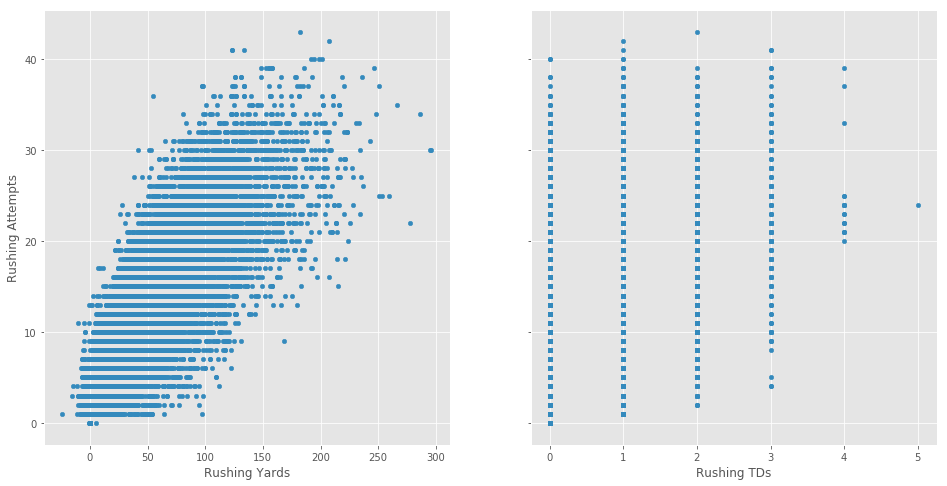

In [214]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
rb.plot(kind='scatter', x='Rushing Yards', y='Rushing Attempts', ax=axs[0], figsize=(16, 8))
rb.plot(kind='scatter', x='Rushing TDs', y='Rushing Attempts', ax=axs[1]);

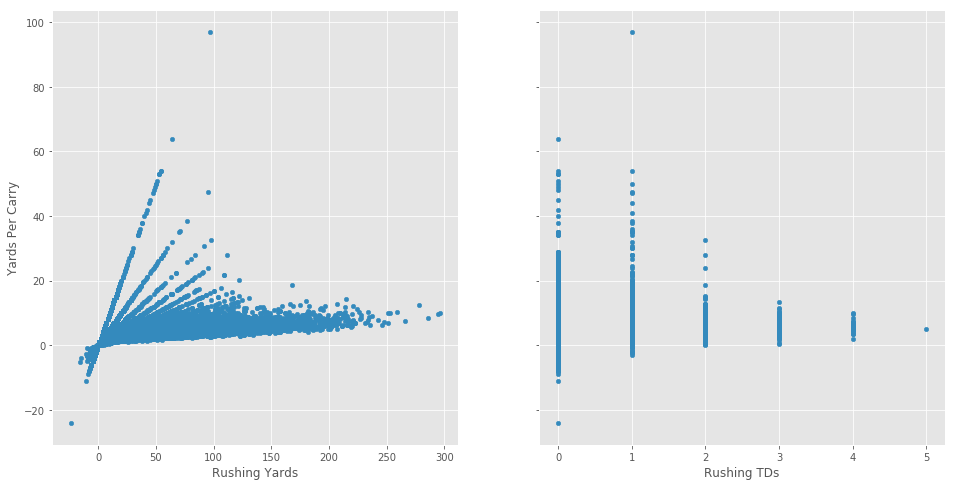

In [215]:
fig, axs = plt.subplots(1, 2, sharey=True)
rb.plot(kind='scatter', x='Rushing Yards', y='Yards Per Carry', ax=axs[0], figsize=(16, 8))
rb.plot(kind='scatter', x='Rushing TDs', y='Yards Per Carry', ax=axs[1]);

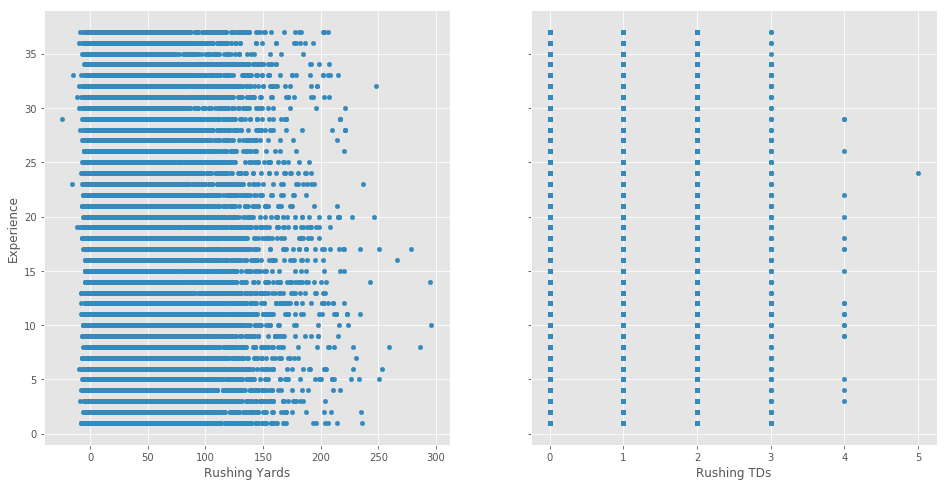

In [216]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
rb.plot(kind='scatter', x='Rushing Yards', y='Experience', ax=axs[0], figsize=(16, 8))
rb.plot(kind='scatter', x='Rushing TDs', y='Experience', ax=axs[1]);

#### WR Analysis

In [241]:
print(wr.shape)
wr.describe()
# may have to eliminate running backs without a minimum number of rushing attempts
# currently all numbers are skewed by 0s from rb's without a lot of playing time

(107198, 29)


,Year,Week,Games Played,Games Started,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs,Rushing Attempts,Rushing Yards,Yards Per Carry,Longest Rushing Run,Rushing TDs,Fumbles,Fumbles Lost,Age,Height (inches),Weight (lbs),Experience
count,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.000000,107198.00000,107198.000000,107198.000000,107198.000000,107198.000000,105499.000000,107086.000000,107195.000000,107198.000000
mean,2001.717756,8.504049,0.870333,0.319586,1.648977,21.820668,7.212959,10.909439,0.139490,0.059749,0.349764,0.26321,0.308289,0.001614,0.029618,0.014478,40.873307,73.716835,218.030972,15.282244
std,10.584930,5.464800,0.335938,0.466318,2.184098,32.254428,8.841847,14.325603,0.401486,0.390856,3.100170,2.28920,2.594814,0.040140,0.180046,0.122382,11.472219,2.688411,31.772659,10.584930
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,-12.000000,-8.000000,0.000000,0.000000,-34.000000,-34.00000,-34.000000,0.000000,0.000000,0.000000,21.000000,66.000000,1.000000,1.000000
25%,1993.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,31.000000,72.000000,190.000000,6.000000
50%,2003.000000,8.000000,1.000000,0.000000,1.000000,6.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,39.000000,74.000000,211.000000,14.000000
75%,2011.000000,13.000000,1.000000,1.000000,3.000000,33.000000,12.300000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,50.000000,76.000000,248.000000,24.000000
max,2016.000000,23.000000,1.000000,1.000000,21.000000,336.000000,99.000000,99.000000,5.000000,24.000000,154.000000,86.00000,93.000000,1.000000,4.000000,3.000000,84.000000,80.000000,330.000000,37.000000


In [218]:
wr.dtypes

Position                object
Year                     int64
Season                  object
Week                     int64
Game Date               object
Home or Away            object
Opponent                object
Outcome                 object
Score                   object
Games Played             int64
Games Started            int64
Receptions               int64
Receiving Yards          int64
Yards Per Reception    float64
Longest Reception        int64
Receiving TDs            int64
Rushing Attempts         int64
Rushing Yards            int64
Yards Per Carry        float64
Longest Rushing Run      int64
Rushing TDs              int64
Fumbles                  int64
Fumbles Lost             int64
Age                    float64
College                 object
Current Team            object
Height (inches)        float64
Weight (lbs)           float64
Experience               int64
dtype: object

In [219]:
print(len(wr) - len(wr['Receptions'].dropna()))
print(len(wr) - len(wr['Receiving TDs'].dropna()))

0
0


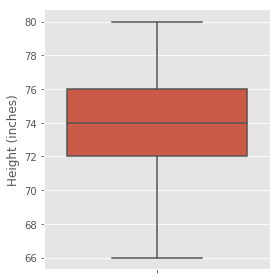

In [220]:
#side by side violins of height and weight
sns.factorplot(
    y='Height (inches)',
    data=wr, 
    kind='box'
);
#the measurer estimates the players height to the half inch most of the time
#and to the quarter inch less frequently, so there are dips in between
#this makes the violin less helpful so switching to box instead

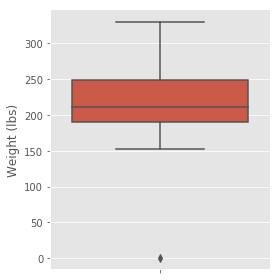

In [221]:
#side by side violins of height and weight
sns.factorplot(
    y='Weight (lbs)',
    data=wr, 
    kind='box'
);
#similar to height, measurers round to 5 lbs in some instances
#this makes the violin less helpful so switching to box instead

In [222]:
wr_college_counts = wr.College.value_counts()
wr_college_counts.head(3)

Miami (Fla.)    2810
Ohio State      2467
Florida         2346
Name: College, dtype: int64

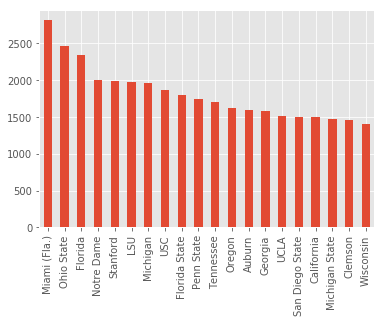

In [223]:
wr_college_counts[:20].plot(kind='bar')

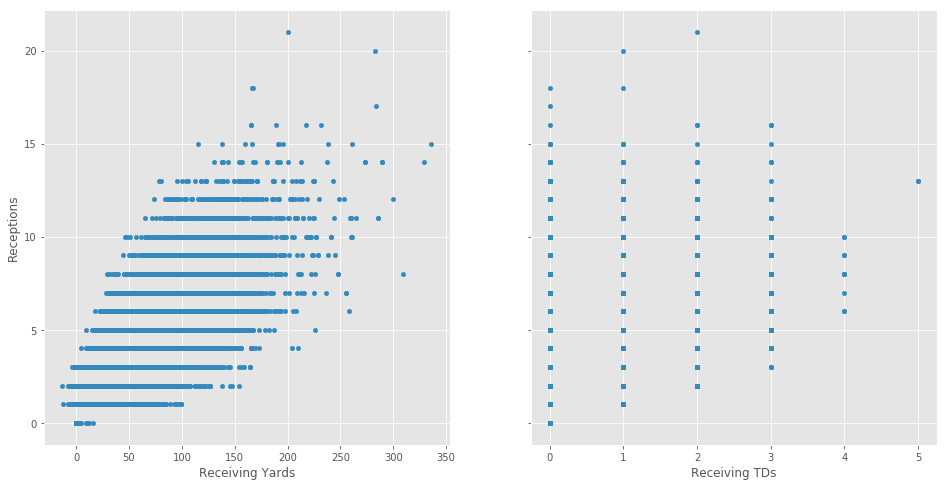

In [224]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
wr.plot(kind='scatter', x='Receiving Yards', y='Receptions', ax=axs[0], figsize=(16, 8))
wr.plot(kind='scatter', x='Receiving TDs', y='Receptions', ax=axs[1]);

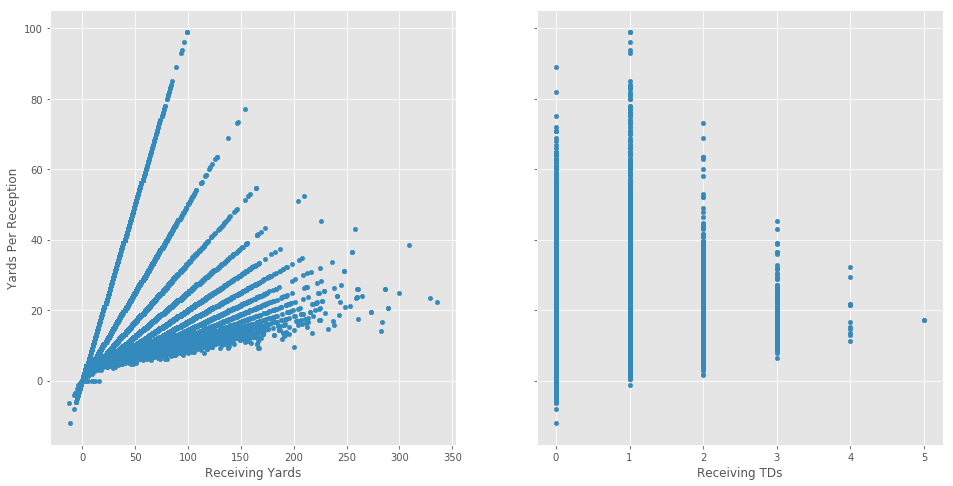

In [225]:
fig, axs = plt.subplots(1, 2, sharey=True)
wr.plot(kind='scatter', x='Receiving Yards', y='Yards Per Reception', ax=axs[0], figsize=(16, 8))
wr.plot(kind='scatter', x='Receiving TDs', y='Yards Per Reception', ax=axs[1]);

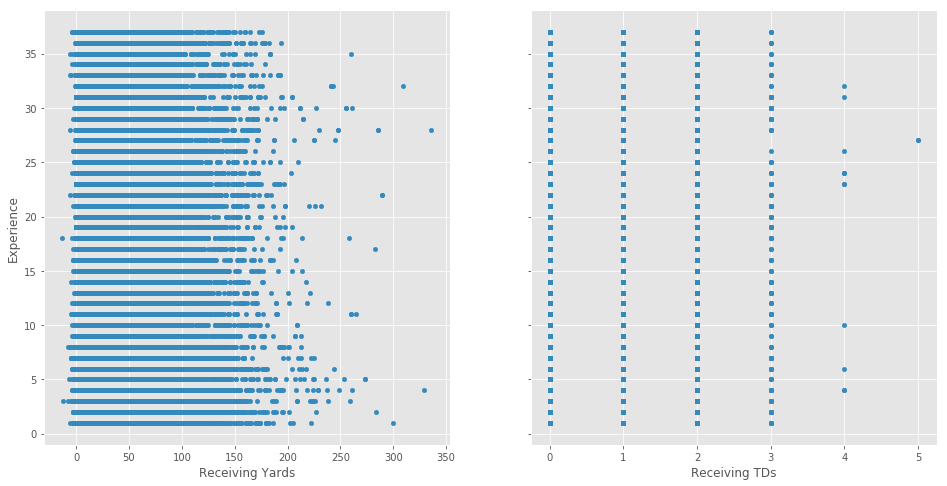

In [226]:
fig, axs = plt.subplots(1, 2, sharey=True)
wr.plot(kind='scatter', x='Receiving Yards', y='Experience', ax=axs[0], figsize=(16, 8))
wr.plot(kind='scatter', x='Receiving TDs', y='Experience', ax=axs[1]);

#### Show Changes in Rush Attempt vs. Reception Frequency Year over Year

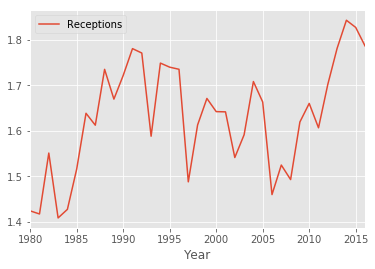

In [231]:
wr.groupby(['Year']).aggregate({"Receptions":np.mean}).plot()

In [239]:
(1.78-1.42)/1.42
# % change between receptions in 1980 and 2016

0.2535211267605635

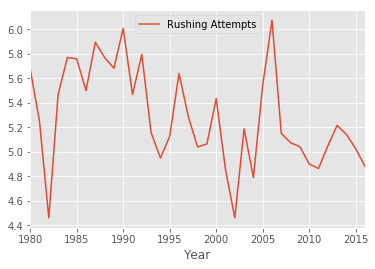

In [232]:
rb.groupby(['Year']).aggregate({"Rushing Attempts":np.mean}).plot()

In [240]:
(4.88-5.67)/4.88
# % change between rushing attempts in 1980 and 2016

-0.16188524590163936